In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
train = pd.read_csv("../stephenim/Downloads/train.csv")
test = pd.read_csv("../stephenim/Downloads/test.csv")
# import os
# path = os.listdir("../stephenim/Downloads")
# print(path)

In [54]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
data = np.array(train)
m, n = data.shape

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [57]:
def relu(x):
    x[x<0]=0
    return x

In [58]:
Y_train

array([1, 5, 1, ..., 7, 6, 9])

In [59]:
def init_params():
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
    return W1, b1, W2, b2
    return W1, b1, W2, b2

In [60]:
def softmax(x):
    result = np.exp(x) / sum(np.exp(x))
    return result

In [61]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [62]:
def relu_pos(x):
    return x > 0

In [63]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [64]:

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * relu_pos(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [65]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [66]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [67]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [68]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[0 8 0 ... 8 0 8] [1 5 1 ... 7 6 9]
0.11460975609756098
Iteration:  10
[8 0 8 ... 0 0 8] [1 5 1 ... 7 6 9]
0.17285365853658535
Iteration:  20
[1 0 1 ... 8 0 8] [1 5 1 ... 7 6 9]
0.2769268292682927
Iteration:  30
[1 0 1 ... 8 0 8] [1 5 1 ... 7 6 9]
0.3829268292682927
Iteration:  40
[1 2 1 ... 7 6 8] [1 5 1 ... 7 6 9]
0.5141707317073171
Iteration:  50
[1 2 1 ... 7 6 7] [1 5 1 ... 7 6 9]
0.6074634146341463
Iteration:  60
[1 2 1 ... 7 6 7] [1 5 1 ... 7 6 9]
0.6962926829268292
Iteration:  70
[1 4 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.7431463414634146
Iteration:  80
[1 4 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.769390243902439
Iteration:  90
[1 4 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.790609756097561
Iteration:  100
[1 4 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.8077317073170732
Iteration:  110
[1 4 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.821170731707317
Iteration:  120
[1 4 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.8306585365853658
Iteration:  130
[1 4 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.8388292682926829
Iteration:  140
[1

In [69]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


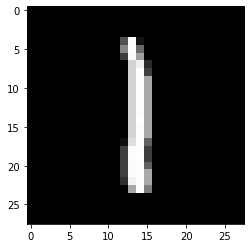

Prediction:  [8]
Label:  5


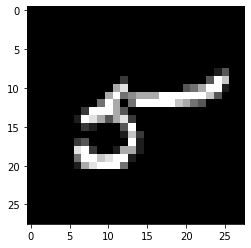

Prediction:  [1]
Label:  1


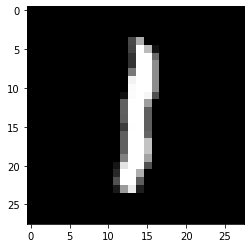

Prediction:  [7]
Label:  7


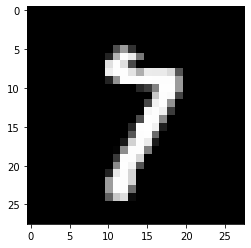

In [70]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Prediction:  [3]
Label:  3


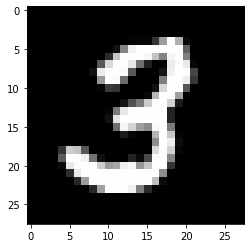

Prediction:  [2]
Label:  2


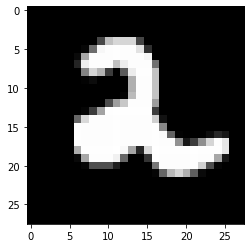

Prediction:  [6]
Label:  6


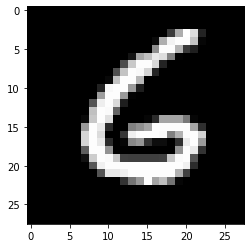

Prediction:  [4]
Label:  4


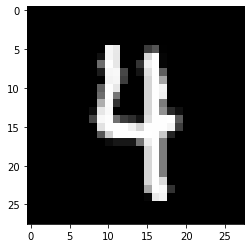

In [71]:
test_prediction(72, W1, b1, W2, b2)
test_prediction(63, W1, b1, W2, b2)
test_prediction(52, W1, b1, W2, b2)
test_prediction(14, W1, b1, W2, b2)

In [72]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 0 1 2 0 0 7 3 5 3 8 9 1 3 3 1 8 0 7 6 8 6 2 0 2 3 6 9 9 7 8 9 4 9 6 1 3
 1 1 4 3 1 4 9 2 6 5 7 7 4 7 5 1 9 0 2 2 3 9 1 6 8 8 0 6 3 4 8 1 0 3 9 6 3
 6 4 7 1 4 1 5 4 8 9 2 1 9 8 9 4 5 6 4 6 3 7 1 2 0 5 9 2 7 7 4 8 8 5 0 6 0
 0 2 9 0 4 7 7 1 5 7 9 4 6 1 6 7 6 5 0 4 9 2 8 1 1 7 3 7 2 1 0 3 4 5 4 0 5
 4 5 3 5 1 0 8 3 7 0 9 6 6 9 5 9 6 9 8 5 4 2 4 8 7 4 5 8 8 8 2 6 9 3 1 0 4
 1 5 9 0 6 2 5 7 0 6 0 0 5 3 2 0 0 6 0 0 4 7 2 7 1 9 9 3 9 8 4 6 5 1 3 8 1
 8 7 1 3 7 6 3 6 3 6 3 2 3 6 2 7 9 2 2 2 7 5 4 8 8 2 0 1 4 9 6 3 7 1 1 1 4
 7 0 2 9 2 0 5 6 0 5 9 6 2 0 0 7 2 0 4 2 6 9 1 6 9 3 0 0 2 0 6 8 4 0 7 2 1
 9 5 2 4 8 5 2 9 7 9 2 9 7 4 9 3 2 2 3 6 3 6 8 8 3 7 0 9 2 7 9 0 5 4 5 8 4
 3 3 1 7 8 9 7 6 2 1 7 0 5 6 0 3 9 5 4 6 2 2 2 9 0 7 7 2 2 6 3 4 8 0 5 9 0
 2 1 9 0 6 0 4 5 4 3 1 5 4 2 9 5 7 3 1 5 4 5 3 7 3 8 6 4 4 6 1 1 4 0 0 5 8
 6 7 4 2 8 0 2 5 4 8 3 0 6 4 8 6 4 1 8 1 5 4 7 4 3 2 0 6 0 7 9 2 9 8 9 6 3
 2 4 4 6 4 8 4 1 7 5 8 4 5 9 3 7 3 8 2 2 7 2 8 9 1 9 3 6 0 2 2 9 1 2 7 2 1
 3 4 9 1 8 0 2 2 3 4 1 3 

0.899